In [104]:
import sys
sys.path.insert(0, '..')
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from mxnet.gluon import data as gdata
import sys
import time
from mxnet import gluon, init, autograd
from mxnet.gluon import loss as gloss, nn
import mxnet as mx
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon

In [119]:
mnist_train = gdata.vision.MNIST(train=True)
mnist_test = gdata.vision.MNIST(train=False)
len(mnist_train), len(mnist_test)

(60000, 10000)

In [106]:
feature, label = mnist_train[0]
feature.shape, feature.dtype
# reshaped = nd.reshape(feature,(28,28))
# print(reshaped)

((28, 28, 1), numpy.uint8)

In [107]:
label, type(label), label.dtype


(5, numpy.int32, dtype('int32'))

In [108]:
def get_mnist_labels(labels):
   text_labels = ['zero', 'one', 'two', 'three', 'four',
   'five', 'six', 'seven', 'eight', 'nine']
   return [text_labels[int(i)] for i in labels]


In [109]:
def show_mnist(images, labels):
   display.set_matplotlib_formats('svg')
   # Here _ means that we ignore (not use) variables
   _, figs = plt.subplots(1, len(images), figsize=(12, 12))
   for f, img, lbl in zip(figs, images, labels):
       f.imshow(img.reshape((28, 28)).asnumpy())
       f.set_title(lbl)
       f.axes.get_xaxis().set_visible(False)
       f.axes.get_yaxis().set_visible(False)
        

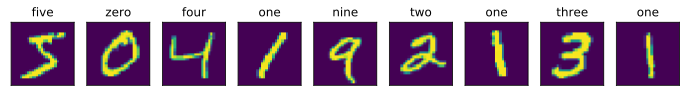

In [121]:
X, y = mnist_train[0:9]
show_mnist(X, get_mnist_labels(y))

In [111]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor()
if sys.platform.startswith('win'):
    num_workers = 0
else:
    num_workers = 4

train_iter = gdata.DataLoader(mnist_train.transform_first(transformer),
   batch_size, shuffle=True,
   num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
   batch_size, shuffle=False,
   num_workers=num_workers)


In [112]:
start = time.time()
for X, y in train_iter:
    continue
'%.2f sec' % (time.time() - start)


'1.11 sec'

In [113]:
#Initialize the Model
def init(net, optimizer='sgd', learning_rate=0.1, weight_decay=1e-6, ctx=mx.cpu()):
   net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)
   trainer = gluon.Trainer(net.collect_params(),
                           optimizer,
                           {'learning_rate': learning_rate, 'wd': weight_decay})
   return trainer

In [114]:
# Computing Accuracy
def accuracy(data_iterator, net,ctx=mx.cpu()):
   acc = mx.metric.Accuracy()
   for (data, label) in data_iterator:
       data = data.as_in_context(ctx)
       label = label.as_in_context(ctx)
       output = net(data)
       predictions = mx.nd.argmax(output, axis=1)
       acc.update(preds=predictions, labels=label)
   return acc.get()[1]

In [115]:
#Training the Model
def train(net, trainer, train_data, validation_data, epochs, ctx=mx.cpu()):
   training_accuracies = []
   validation_accuracies = []
   softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
   for e in range(epochs):
       tic = time.time()
       for (data, label) in train_data:
           data  = data.as_in_context(ctx)
           label = label.as_in_context(ctx)
           with autograd.record():
               output = net(data)
               loss = softmax_cross_entropy(output, label)
               loss.backward()
           trainer.step(data.shape[0])
       toc = time.time()
       train_accuracy = accuracy(train_data, net)
       training_accuracies.append(train_accuracy)
       validation_accuracy = accuracy(validation_data, net)
       validation_accuracies.append(validation_accuracy)
       print("Epoch#%d Time=%.2f Training=%.4f Validation=%.4f Diff=%.4f"
             % (e, toc-tic, train_accuracy, validation_accuracy, train_accuracy-validation_accuracy))
   return training_accuracies, validation_accuracies

In [116]:
#Plotting
def plot_accuracies(training_accuracies, validation_accuracies):
   epochs = len(training_accuracies)
   plt.clf()
   fig, ax = plt.subplots()
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   train_plot, = ax.plot(range(epochs), training_accuracies, label="Training accuracy")
   validation_plot, = ax.plot(range(epochs), validation_accuracies, label="Validation accuracy")
   plt.legend(handles=[train_plot,validation_plot])
   plt.xticks(np.arange(0, epochs, 5))
   ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f'))
   plt.show()

Epoch#0 Time=1.44 Training=0.8768 Validation=0.8838 Diff=-0.0070
Epoch#1 Time=1.15 Training=0.8907 Validation=0.8956 Diff=-0.0049
Epoch#2 Time=1.28 Training=0.8988 Validation=0.9049 Diff=-0.0061
Epoch#3 Time=1.21 Training=0.9019 Validation=0.9088 Diff=-0.0069
Epoch#4 Time=1.07 Training=0.9065 Validation=0.9095 Diff=-0.0030
Epoch#5 Time=1.20 Training=0.9081 Validation=0.9139 Diff=-0.0058
Epoch#6 Time=1.06 Training=0.9103 Validation=0.9159 Diff=-0.0056
Epoch#7 Time=1.30 Training=0.9117 Validation=0.9151 Diff=-0.0034
Epoch#8 Time=1.31 Training=0.9132 Validation=0.9158 Diff=-0.0026
Epoch#9 Time=1.16 Training=0.9134 Validation=0.9172 Diff=-0.0038
Epoch#10 Time=1.25 Training=0.9160 Validation=0.9178 Diff=-0.0018
Epoch#11 Time=1.15 Training=0.9153 Validation=0.9170 Diff=-0.0017
Epoch#12 Time=1.29 Training=0.9172 Validation=0.9178 Diff=-0.0006
Epoch#13 Time=1.25 Training=0.9175 Validation=0.9179 Diff=-0.0004
Epoch#14 Time=1.25 Training=0.9183 Validation=0.9195 Diff=-0.0012
Epoch#15 Time=1.15 T

<Figure size 432x288 with 0 Axes>

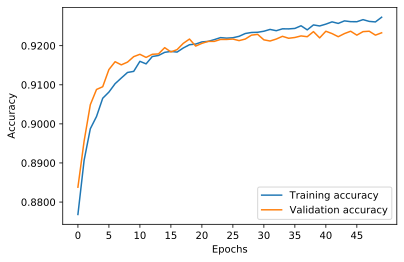

In [117]:
net = nn.Sequential()
net.add(nn.Dense(10))
trainer = init(net)
training_accuracies, validation_accuracies = train(net, trainer, train_iter, test_iter, 50)
plot_accuracies(training_accuracies, validation_accuracies)

In [118]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import cv2
import mxnet as mx
from mxnet import nd, autograd, gluon
ctx=mx.cpu()
def verify_loaded_model(net):
   """Run inference using ten random images.
   Print both input and output of the model"""

   def transform(data, label):
        return data.astype(np.float32)/255, label.astype(np.float32)

   # Load ten random images from the test dataset
   sample_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
                                 10, shuffle=True)

   for data, label in sample_data:
        print(label)
        # Display the images
        img = nd.transpose(data, (1,0,2,3))
        img = nd.reshape(img, (28,10*28,1))
        imtiles = nd.tile(img, (1,1,3))
        plt.imshow(imtiles.asnumpy())
        plt.show()

        # Display the predictions
        data = nd.transpose(data, (0, 3, 1, 2))
        out = net(data.as_in_context(ctx))
        predictions = nd.argmax(out, axis=1)
        print('Model predictions: ', predictions.asnumpy())

        break

# verify_loaded_model(net)

In [95]:
from mxnet.gluon.data.vision import transforms
def get_image(url, show=False):
   # download and show the image
   fname = mx.test_utils.download(url)
   img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2GRAY)
   img = cv2.resize(img, (224, 224))
   plt.imshow(img)
   return fname
get_image()





In [96]:
def classify(net, url):
   fname = get_image(url)
   transformer = transforms.ToTensor()
   with open(fname, 'rb') as f:
       img = mx.image.imdecode(f.read())
   data = transformer(img)
   #data = nd.transpose(data, (0, 3, 1, 2))
   data = data.reshape((1, 1, 28, 28))
   out = net(data.as_in_context(mx.gpu()))
   print(out)
   predictions = nd.argmax(out, axis=1)
   print('Model predictions: ', predictions.asnumpy())
   return predictions.asnumpy()